# Phys 260 Python Lab 2: Numpy tools for vectorized actions

# Introduction -- Reminder

Each Python lab will start with a pre-flight exercise that walks through building some of the set up and tools ($\sim$ 30 min), followed by an in-class tutorial with time for Q+A (50 min) so you can walk through steps that will be necessary for the homework assignment you will submit ($\sim$ 3 hrs).  Each lab will contain starter code, similar to what you see below.  Please fill in the code to complete the pre-flight assignment in preparation for the in-class tutorial.  

Preflight ($\sim$30-60 min, 10 points) **Typically due: Thursdays 3pm EST**

*Preflight typically graded by Wednesday 5p EST*

In-class tutorial and Q+A ($\sim$ 50 min, 10 points) **Typically occurs: Fridays EST**

Homework assignment ($\sim$ 3-5 hrs, 30 points) **Typically due: Tuesdays 12pm EST**  


When we grade your homework, we will not run your code. Once submitted, your notebook should have the outputs for all of your results.  Please do not include long outputs from debugging, beyond a few print statements and the requested visualimzations (i.e. plots).

**Grading:** When we grade your notebook, we will convert the .ipynb file to an HTML file.  We will be using [nbgrader](https://nbgrader.readthedocs.io/en/stable/) to grade your notebooks.  **Note:** Execute the cell below (click in the cell and press shift+enter, or click in the cell and press the Run button) to check that you are using a version of python that is compatible with the tool we are using to grade your assignments.  If your ```IPython``` version is too old, we will *not* be able to grade your assignments.


## Preflight summary
- Brief review of creating arrays
- Creating an (n,m,...) shaped array and examining the contents (2 points)
- Example of array operations using explicit power notation and a logarithm. (2 points)
- Calculate the electric field in a vectorized fashion (loop vs. one-liner!). (3 points)
- Calculate efield magnitude with different dimensions (1 point)
- Quiver plot (1 points) 

In [1]:
# Import relevant modules
import numpy as np
from matplotlib import pyplot as plt

## Brief review of creating arrays

Numpy arrays are simply a grid of values, which are 0-indexed.  There are a number of ways to create a numpy array.  Below, we show: 
- Creating a numpy array from a list
- Creating a numpy array using `arange`
- Creating a numpy array using `linspace`

These are all shape (n,), essentially 1-d arrays.

In [2]:
# Manually input a list of values and enclose in np.array()
test_list = [0.5, 1, 0, 20]
array_from_list = np.array(test_list)
print("array from list: ",array_from_list)
print("shape: ", array_from_list.shape)

# Use a numpy function to generate a certain kind of array
array_from_arange = np.arange(1, 10, 0.5)
print("array from arange: ", array_from_arange)
print("shape: ", array_from_arange.shape)

array_from_linspace = np.linspace(1,10,20)
print("array from linspace: ", array_from_linspace)
print("shape: ", array_from_linspace.shape)

array from list:  [ 0.5  1.   0.  20. ]
shape:  (4,)
array from arange:  [1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5 9.  9.5]
shape:  (18,)
array from linspace:  [ 1.          1.47368421  1.94736842  2.42105263  2.89473684  3.36842105
  3.84210526  4.31578947  4.78947368  5.26315789  5.73684211  6.21052632
  6.68421053  7.15789474  7.63157895  8.10526316  8.57894737  9.05263158
  9.52631579 10.        ]
shape:  (20,)


## Creating an (n,m,...) shaped array and examining the contents (2 points)
With the numpy function `meshgrid`, we can also create shape (n,m,...) arrays.  In homework/tutorial 1, we created arrays that were (2,2,2) and (10,10,10), all 3-d arrays sampling space in a **cube**.  Below, we review creating the (2,2,2) array that samples a meshgrid, and take a look at how to create a (3,2,2) array sampling a 3-d meshgrid that is a **rectangular prism** instead of a cube. 

In [2]:
# Setting up points in a cube
sample_points_cube = np.linspace(-1,1,num=2)
print("sample_points_cube shape: ", sample_points_cube.shape)
cube_points_x, cube_points_y, cube_points_z = np.meshgrid(sample_points_cube, 
                                                          sample_points_cube, 
                                                          sample_points_cube, 
                                                          indexing='ij')
print("x coordinates of points in cube: \n", cube_points_x)
print("\n shape of x coordinates", cube_points_x.shape)

# Setting up points in a rectangular prism
sample_points_prism_x = np.linspace(-1,1,num=3)
print("\n sample_points_prism_x: ", sample_points_prism_x.shape)
prism_points_x, prism_points_y, prism_points_z = np.meshgrid(sample_points_prism_x, 
                                                             sample_points_cube, 
                                                             sample_points_cube, 
                                                             indexing='ij')
print("\n x coordinates of points in cube: \n", prism_points_x)
print("\n shape of x coordinates", prism_points_x.shape)

sample_points_cube shape:  (2,)
x coordinates of points in cube: 
 [[[-1. -1.]
  [-1. -1.]]

 [[ 1.  1.]
  [ 1.  1.]]]

 shape of x coordinates (2, 2, 2)

 sample_points_prism_x:  (3,)

 x coordinates of points in cube: 
 [[[-1. -1.]
  [-1. -1.]]

 [[ 0.  0.]
  [ 0.  0.]]

 [[ 1.  1.]
  [ 1.  1.]]]

 shape of x coordinates (3, 2, 2)


**Explain:** 
- How many points sample the cube (how might you find this out)? What would you have to change for there to be 27 points sampling the cube? (1 point)
- How many points sample the prism?  What happens if you change the kwarg `indexing='ij'` to `indexing='xy'`? (1 point)


- There are 8 points that sample the cube, we can find this out with cube_points_x.size.  We can change `num=2` to `num=3` to get 27 points.
- There are 18 points that sample the prism.  If we change the kwarge `indexing`, the placement of the length 3 axis (x coordinates) changes.  

## Array operations (2 points)

Let us start with a simple example, similar to what you saw at the end of the first preflight.  First, let's define the variable, `base_array` using `np.arange`, starting at 1, stopping at 10.5 in steps of 0.5 (recall, `np.arange` will not include the stopping point).

In [3]:
# Define base_array below
### BEGIN SOLUTION
base_array = np.arange(1,10.5,0.5)
### END SOLUTION

In [4]:
"""Execute this to test that you have properly defined base_array"""
assert(base_array[0]==1)
### BEGIN HIDDEN TESTS
assert((base_array==np.arange(1,10.5,0.5)).all())
### END HIDDEN TESTS

Next, let us create a new array that contains each element of `base_array` cubed.  There are two ways to do this.  I will show you the less-efficient way below, and you will execute the more efficient way on your own.  There are four steps to this less efficient way:
- Create an empty list, `powered_list_from_loop`.  This is where we will collect the value of each `base_array` element raised to the third power.
- Create a `for` loop to iterate over each `base_array` element, which we will call `base_value`.
- In the `for` loop, set the variable `powered_value` equal to `base_value` to the third power. 
- Still in the `for` loop, append the `powered_value` to the list `powered_list_from_loop`.
- After exiting the `for` loop, create an array, `powered_array_from_loop`,  out of the list `powered_list_from_loop`.

In [5]:
# Create an empty array where we will collect the powered values
powered_list_from_loop = []

# Looping over each value in base_array
for base_value in base_array :
    # set powered_value equal to base_value cubed
    powered_value = base_value**3
    
    # Append powered_value to the list
    powered_list_from_loop.append(powered_value)
    
# Create an array from a list    
powered_array_from_loop = np.array(powered_list_from_loop)
    
print(powered_array_from_loop)

[   1.       3.375    8.      15.625   27.      42.875   64.      91.125
  125.     166.375  216.     274.625  343.     421.875  512.     614.125
  729.     857.375 1000.   ]


Now, **define a variable**, `powered_array` that is the cube of each value in `base_array`, but do this in one step.  Recall, raising something to a power uses two asterisks, \*\*

In [6]:
# Define powered_array here

### BEGIN SOLUTION
powered_array = base_array**3
### END SOLUTION

print(powered_array)

[   1.       3.375    8.      15.625   27.      42.875   64.      91.125
  125.     166.375  216.     274.625  343.     421.875  512.     614.125
  729.     857.375 1000.   ]


In [8]:
"""Execute this cell to check that your solution is on the right track"""
assert(powered_array[0] == powered_array_from_loop[0])
### BEGIN HIDDEN TESTS
assert((powered_array == powered_array_from_loop).all())
### END HIDDEN TESTS

Here are some other [array operations](https://problemsolvingwithpython.com/05-NumPy-and-Arrays/05.07-Array-Opperations/) you can do.  Output the base 10 log of of `powered_array` in one line. (Note: the last element is 3, because we just did $10^3$, then took the base 10 log of that.)

In [9]:
# Output the base 10 log here

np.log10(powered_array)


array([0.        , 0.52827378, 0.90308999, 1.19382003, 1.43136376,
       1.63220413, 1.80617997, 1.95963754, 2.09691001, 2.22108807,
       2.33445375, 2.43874007, 2.53529412, 2.62518379, 2.70926996,
       2.78825678, 2.86272753, 2.93317082, 3.        ])

## Calculating the electric field in a vectorized fashion (3 points)

In the first tutorial/hw, we calculated the electric field at a single point in the field due to a point charge.  To find the electric field at all points we sampled in the field (i.e. the meshgrid), we ended up doing a big loop where we effectively found the euclidean distance between the charge position and each point in the meshgrid.  

```
### THIS IS WHAT WE DID IN TUTORIAL/HW 1

# Create an empty list to collect the electric field at each field position
efield_list = []

charge_position = np.array([0,0,0])

# Loop over all points in the meshgrid
for x, y, z in zip(np.ravel(xarray), np.ravel(yarray), np.ravel(zarray)) :
    field_position = np.array([x,y,z])
    print("Calculating efield at: ", field_position)
    
    # Calculate the electric field at each point
    efield_at_point = calculate_efield_at_point(charge_position, field_position, q=1) 
    print("efield is: ", efield_at_point)
    
    # Append the electric field to a list
    efield_list.append(efield_at_point)
    
efield_vectors = np.array(efield_list)
    
```

Note the parallels between this and the earlier exercise of the preflight.  We will do a similar thing, but will use the `apply_along_axis` function of numpy to do this *all in one line*.   

First, **define your meshgrid points** the same way we did in tutorial/hw 1.

```
num_points_1d = 2
sample_points = np.linspace(-1, 1, num=num_points_1d)
xarray, yarray, zarray = np.meshgrid(sample_points, sample_points, sample_points, indexing='ij')
```

In [8]:
#  Define your meshgrid points here
### BEGIN SOLUTION
num_points_1d = 2
sample_points = np.linspace(-1, 1, num=num_points_1d)
xarray, yarray, zarray = np.meshgrid(sample_points, sample_points, sample_points, indexing='ij')
### END SOLUTION

In [9]:
"""Execute this cell to check that your sample points and meshgrid points are defined correctly"""
assert((sample_points == np.linspace(-1,1,num_points_1d)).all())
assert(xarray[0][0][0]==-1)
assert(yarray[0][0][0]==-1)
assert(zarray[0][0][0]==-1)

### BEGIN HIDDEN TESTS
xtest, ytest, ztest = np.meshgrid(sample_points, sample_points, sample_points, indexing='ij')
assert((xtest==xarray).all())
assert((ytest==yarray).all())
assert((ztest==zarray).all())
### END HIDDEN TESTS

Let us now create one big array with all points in the meshgrid:
```
points_in_meshgrid = np.array([xarray, yarray, zarray])
```
Print out the shape of this new array that you created.

In [10]:
# Define points_in_meshgrid below
### BEGIN SOLUTION
points_in_meshgrid = np.array([xarray, yarray, zarray])
### END SOLUTION
print(points_in_meshgrid.shape)

(3, 4, 4, 4)


In [11]:
"""Execute this cell to check that you've properly defined points_in_meshgrid"""
assert(points_in_meshgrid.shape == (3,num_points_1d,num_points_1d,num_points_1d))

You'll notice that this is now a 4-d array.  The first dimension corresponds to the number of axes (i.e. x, y, and z means there are three axes). The next 3 dimensions correspond to values of x, y, and z coordinates.  Equivalently, we could have directly defined `points_in_meshgrid`,
```
direct_points_in_meshgrid = np.array(np.meshgrid(sample_points, sample_points, sample_points, indexing='ij'))
```
Define the above in the cell below, and print its shape.

In [12]:
#  Define direct_points_in_meshgrid here, and print the shape
### BEGIN SOLUTION
direct_points_in_meshgrid = np.array(np.meshgrid(sample_points, sample_points, sample_points, indexing='ij'))
### END SOLUTION
print(direct_points_in_meshgrid.shape)

(3, 4, 4, 4)


In [13]:
"""Execute this cell to check that you have done the above cell correctly"""
assert((direct_points_in_meshgrid[0] == xarray).all() )

Next, we use the same function from the tutorial/hw to calculate the efield at a single field point, but we switch `field_position` with `charge_position` in the order of function arguments.  This is because field position is what gets varied over the entire `points_in_meshgrid`, and we want that to be the first argument of `calculate_efield_at_point`.  Also, let us set `k=1` to simplify visualizations in plots.

In [14]:
def calculate_efield_at_point(field_position, charge_position, q=1) :
    '''Return the electric field due to a point charge.
    
    Inputs:
    field_position (n-darray) : x, y, and z position vector of a field point
    charge_position (n-darray) : x, y, and z position vector of a charge point
    q (float or int) : charge of the point
    Outputs:
    vector_efield (n-darray) : x, y, z components of the e-field at the point field_position
    '''
    
    k = 1 # A choice to simplify plots
    
    r = field_position-charge_position
    r_magnitude = np.linalg.norm(field_position-charge_position)
    r_unit = r/r_magnitude
    
    return k*q / r_magnitude**2 * r_unit

With a `charge_position` at the origin, we now calculate `efield_vectors` all in a single line with `apply_along_axis`, see [documentation](https://numpy.org/doc/stable/reference/generated/numpy.apply_along_axis.html),  
```
efield_vectors = np.apply_along_axis(calculate_efield_at_point, 0, points_in_meshgrid, charge_position)
```
the second argument corresponds to the axis along which we apply `calculate_efield_at_point`.  However, our resulting array will have a different shape than when we did it in the loop (n,n,n,3) vs. (3,n,n,n). We will have to take this into account.

In [15]:
charge_position = np.array([0,0,0])

# Define efield_vectors below
### BEGIN SOLUTION
efield_vectors = np.apply_along_axis(calculate_efield_at_point, 0, 
                                     points_in_meshgrid, charge_position)
### END SOLUTION
print(efield_vectors.shape)

(3, 4, 4, 4)


In [16]:
"""Execute this to check that you've run the correct code"""
assert(efield_vectors.shape == (3,num_points_1d,num_points_1d,num_points_1d))
efield_vectors[0].ravel().shape
xarray.ravel().shape

(64,)

##  Calculate the efield magnitude (1 point)
Similar to the tutorial/hw 1, we calculate the `efield_magnitude` using `np.linalg.norm`.  We will later use this in a visualization.  First, we have to account for the different shapes.  In the loop, the x, y, z axes varied over the last dimension.  Now, it varies over the first dimension, so the shape is (3,n,n,n).  Note, the axis we take the magnitude over is now the 0th axis (i.e. an $x^2+y^2+z^2$ over each of the points).  So, we will want to calculate the magnitude (norm) of efield_vectors, across the 0th axis,
```
np.linalg.norm(efield_vectors, axis=0)
```

In [17]:
# Define the efield_magnitude in this cell.
print("Vectors have shape", efield_vectors.shape)

### BEGIN SOLUTION
efield_magnitude = np.linalg.norm(efield_vectors, axis=0)
### END SOLUTION

print("Magnitude has shape", efield_magnitude.shape)

Vectors have shape (3, 4, 4, 4)
Magnitude has shape (4, 4, 4)


In [18]:
"""Execute this cell to check that your efield_magnitude has been properly defined"""
print(efield_vectors[:,0,0,0])
assert(efield_magnitude[0][0][0] == np.linalg.norm(efield_vectors[:,0,0,0], axis=0))

[-0.19245009 -0.19245009 -0.19245009]


## Visualize with quiver (1 point)

Similar to tutorial/hw1, we visualize the vector field with quiver.  Let's ravel everything (ravel the xarray, yarray, efield_vectors[0], efield_vectors[1]) so we don't have to worry about aligned shape.  You can do this since `ravel` is a *method* of any numpy array, and all of these are numpy arrays. Or, you can use the function `np.ravel`.  See [documentation](https://numpy.org/doc/stable/reference/generated/numpy.ravel.html). 

Then, go back to where we define `num_points_1d` and change that value to 4.  Run all cells after.

Text(0.5, 1.0, 'E Field of Point Charge')

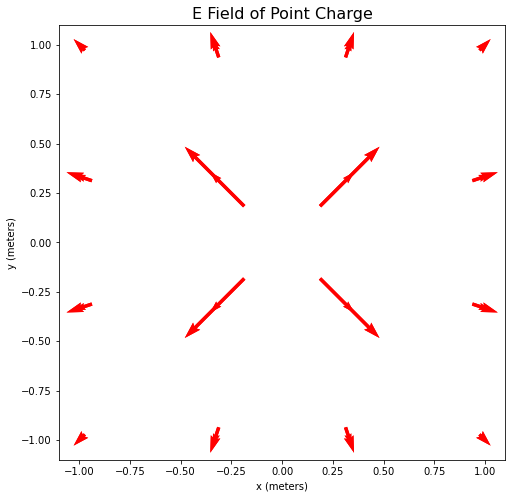

In [19]:
# Use quiver here
#  Plot the vector field using the quiver method
fig, ax1 = plt.subplots(1, figsize=(8,8))

### BEGIN SOLUTION
ax1.quiver(xarray.ravel(), yarray.ravel(),
           efield_vectors[0].ravel(), 
           efield_vectors[1].ravel(), 
           pivot='mid', color='r')
### END SOLUTION

ax1.set_xlabel('x (meters)')
ax1.set_ylabel('y (meters)')
ax1.set_title('E Field of Point Charge', fontsize=16)